### Kaggle Competition | Aprendizaje automático / Machine Learning en el  desastre del Titanic 

> El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de colisionar con un iceberg, matando a 1502 de 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocionó a la comunidad internacional y condujo a mejores regulaciones de seguridad para los buques.

> Una de las razones por las que el naufragio provocó tal pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

> En este concurso, se completa el análisis de qué tipo de personas probablemente sobrevivan. En particular, le pedimos que aplique las herramientas de aprendizaje automático para predecir qué pasajeros sobrevivieron a la tragedia.

> En Kaggle Getting Started se ofrece un lugar de partida ideal para personas que pueden no tener mucha experiencia en ciencia de datos y aprendizaje automático.

Desde la competencia [homepage] (http://www.kaggle.com/c/titanic-gettingStarted).


### Objetivo para este cuaderno:
Muestre un ejemplo simple de un análisis del desastre de Titanic en Python usando un complemento completo de utilidades PyData. Esto está dirigido a aquellos que buscan entrar en el campo o aquellos que ya están en el campo y que buscan ver un ejemplo de un análisis hecho con Python.

#### Este cuaderno mostrará ejemplos básicos de:
#### Manejo de datos
* Importación de datos con pandas
* Datos de limpieza
* Exploración de datos a través de visualizaciones con Matplotlib

#### Análisis de los datos
* Técnicas supervisadas de aprendizaje automático:
    + Modelo de regresión de Logit
    + Resultados de trazado
    + Soporte Vector Machine (SVM) usando 4 kernels
    + Random Forest
    + Neural Net usando Keras

#### Valoración del análisis

* Salida de los resultados del cuaderno de Jupyter a Kaggle



#### Bibliotecas requeridas:
* [NumPy] (http://www.numpy.org/)
* [Jupyter] (http://jupyter.org/)
* [Pandas] (http://pandas.pydata.org/)
* [SciKit-Learn] (http://scikit-learn.org/stable/)
* [SciPy] (http://www.scipy.org/)
* [SeaBorn] (pip3 install seaborn)
* [Keras] (pip3 install keras)
* [Tensorflow] (pip3 install tensorflow)

#  PARTE 1.


# I. Cargar el Data y Limpiarlo
Ahora que tenemos una idea de la influencia de la edad y el genero en la supervevivencia de las personas abardo, vamos a limpiar nuestro dataset SIN OMITIR NINGUNA COLUMNA, empezemos de nuevo.

In [1]:
# modules to handle data
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# environment setup
sns.set()
plt.style.use('ggplot')

### CARGAR LOS DATOS y Limpiarlos

In [4]:
# Cargamos nuestros .csv's desde el disco
train_df = pd.read_csv("data/train.csv") 
test_df = pd.read_csv("data/test.csv")
# Convinamos el train y el test dataframes para su analysis
titanic = train_df.append(test_df, ignore_index=True)

# con el metodo .info() podemos ver que tipos de datos tenemos en nuestro dataset por el nombre de su columna.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
# Esto es para despues. Hay que crear unos indices para luego separar nuevamente el Titanic en Train y Test datasets.
train_idx = len(train_df)
test_idx = len(titanic) - len(test_df)

Vamos a darle un vistazo rapido a lo que tenemos hasta el indice 14 de nuestro titanic dataset

In [6]:
titanic.head(n=14)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


Aunque esta es técnicamente la sección "Referencias de datos", antes de hacer cualquier cosa con los datos y llenar los valores que faltan, primero quiero crear una function ´Titulo´ que simplemente extraiga el honorífico de la función Nombre. En pocas palabras, un título honorífico es el Title o rango de una persona determinada, como "Señora" o "Señorita". El siguiente código toma un valor como "Braund, Mr. Owen Harris" de la columna Nombre y extrae "Mr":

In [8]:
# Crea una nueva Columna / Feature para extraer los titulos de los nombres en la columna Name
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [9]:
# Veamos la nueva columna / feature que acabamos de crear
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


Veamos cuantos Titulos unicos existen en nuestro Titanic Dataset

In [10]:
# show count of titles
print("Existen {} titulos unicos.".format(titanic.Title.nunique()))

# show unique titles
print("\n", titanic.Title.unique())

Existen 18 titulos unicos.

 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Como podemos ver ahora, hemos extraído con éxito el título de la columna de nombre. Pero si inspeccionamos los títulos un poco más, vemos algunos que se pueden normalizar como "Capt" y "Col", por ejemplo, son un tipo de "Oficial" y "Mlle" es esencialmente la versión francesa de "Miss". Así que ahora normalizaremos estos títulos para poder reducir aún más el número de títulos.

In [11]:

# normalizar los titulos, creamos un diccionario para relacionar
# una palabra dictionary[key] con otra dictionary[value]

normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}



In [12]:
# Mapeemos / reemplasemos los titulos normalizados con los que actaalmente tenemos en nuestro Titanic Dataset
titanic.Title = titanic.Title.map(normalized_titles)

# vemos cuantos valores tenemos para los títulos normalizados
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


¡Estupendo! Hemos reducido nuestros títulos a 1/3 de los títulos originales después de la normalización.

Para nuestro siguiente paso, vamos a suponer que existe una relación entre la edad de una persona y su título, ya que tiene sentido que alguien que es más joven tenga más probabilidades de ser titulado "Miss" que "Mrs".

Con esto en mente, agruparemos los datos por Sexo, Pclass (Passanger Class: 1, 2 or 3) y Título y luego veremos la edad promedio para las clases agrupadas.

In [13]:
# Agrupar por Sexo, Pclass y Titulo
grouped = titanic.groupby(['Sex','Pclass', 'Title'])

# Vemos la Edad media por Columans/features agrupados (sex, Pclass, Title)
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

Vizualisemos la distribucion de las edades promedio 

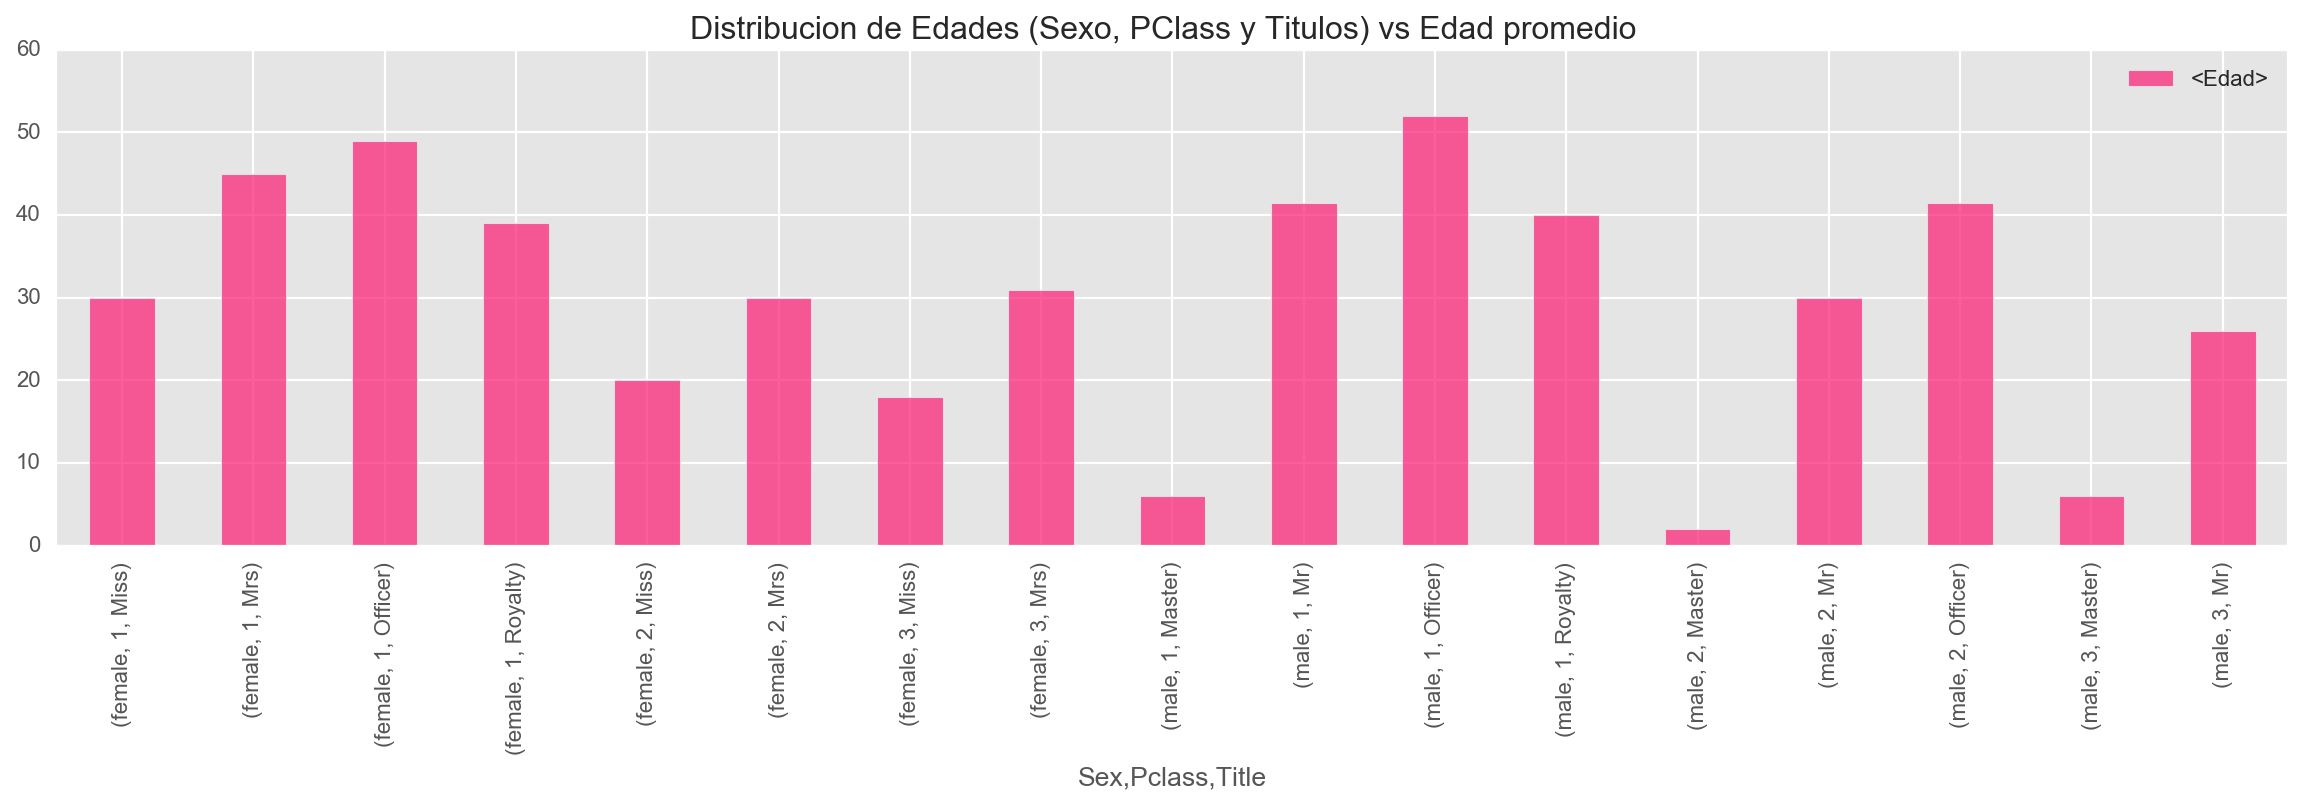

In [87]:
fig = plt.figure(figsize=(18,4), dpi=160)
alpha_level = 0.75

average_age_dist = grouped.Age.median()
average_age_dist.plot(kind='bar', label='<Edad>', color='#FA2879', alpha=alpha_level)
plt.title("Distribucion de Edades (Sexo, PClass y Titulos) vs Edad promedio  "); plt.legend(loc='best')

Como se esperaba, los pasajeros con un título de "señorita/Miss" tienden a ser más jóvenes que los titulados "señora/Mrs". Además, parece que tenemos cierta variabilidad de edad entre las diferentes clases de pasajeros así como entre los sexos, por lo que esto debería ayudarnos a estimar con mayor precisión las edades faltantes para las observaciones que no tienen una edad registrada.

In [17]:
# Aplicamos el valor medio de las agrupaciones que realizamos para llenar los NaN en la columna de Age
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# Ver cambios
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


Pudimos completar los huecos para Age y ahora tenemos 1309 registros.

La siguiente característica que veremos es Cabin y esta será bastante simple. Simplemente llenaremos los NaN con "U" para desconocido.

In [18]:
# fill Cabin NaN with U for unknown
titanic.Cabin = titanic.Cabin.fillna('U')

A continuación, para los 2 valores faltantes para Embarcado / Embarked, simplemente lo completaremos con el puerto de embarque más común.

In [19]:
# Encontrar el valor de Embarked mas frecuente y almasenarlo en una varialbe
most_embarked = titanic.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
titanic.Embarked = titanic.Embarked.fillna(most_embarked)

Por último, solo tenemos un valor de Tarifa/Fare faltante, así que solo lo completaremos con el valor mediano.

In [20]:
# fill NaN with median fare
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

# Ver cambios
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


# II. Explorar el Data y Analizarlo

Ahora tenemos un conjunto de datos completo y limpio sobre el que podemos realizar algunos análisis exploratorios. Probablemente, lo primero que queremos ver es ¿cuál fue la influencia/desajuste de los que murieron (0) frente a los que sobrevivieron (1) al Titanic?

In [21]:

# Ver el porcentaje de los que sobrevivieron vs los que murieron en el Titanic
titanic.Survived.value_counts(normalize=True)



0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

Parece que solo el 38% de las personas a bordo del Titanic lograron sobrevivir a su fatídico viaje.
Profundicemos un poco más y veamos posibilidades de supervivencia por sexo.

In [22]:
# Agrupar por sexo
group_by_sex = titanic.groupby('Sex')

# Ratio de supervivencia por Sexo
group_by_sex.Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Para aquellos de uso que están familiarizados con la fatídica historia del Titanic o que han visto la película, sabemos que las mujeres y los niños tenían prioridad para los botes salvavidas, por lo que estas cifras no son tan sorprendentes. Incluso sabiendo eso, todavía es bastante sorprendente ver que casi el 75% de las mujeres sobrevivieron al hundimiento del Titanic, mientras que solo el 19% de los hombres lo hicieron.

Finalmente, vamos a dividirlo aún más por clase de pasajero y sexo.

In [23]:
# Agrupar pasajeros por Classe y Sexo
group_class_sex = titanic.groupby(['Pclass', 'Sex'])

# Ratios de Supervivencia por classe y sexo
group_class_sex.Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

Parece que las mujeres de primera clase tenían una increíble tasa de supervivencia del 97%, mientras que los hombres de 1ra clase solo tenían un 37% de probabilidades de sobrevivir. Aunque solo tuviste un 37% de probabilidad de sobrevivir como un hombre de primera clase, aún tienes casi 3 veces más probabilidades de sobrevivir que un varón de tercera clase que tuvo la tasa de supervivencia más baja entre el sexo y la clase con un 13.5%.

Para obtener una mejor comprensión de esto, echemos un vistazo a estas figuras visualmente con algunos gráficos. Primero veremos la función Sobrevivido por Sexo.

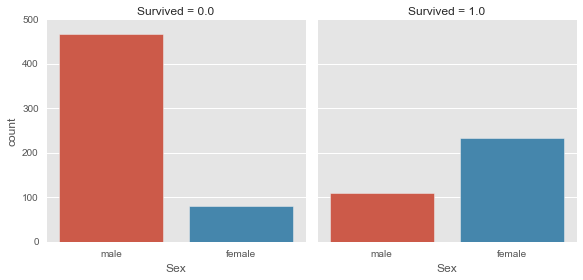

In [24]:
# plot by Survivded, Sex
_ = sns.factorplot(x='Sex', col='Survived', data=titanic, kind='count')

Como ya vimos, la proporción de hombres y mujeres que murieron fue drásticamente a favor de las mujeres. Menos de 100 mujeres murieron en comparación con más de 400 hombres.

Veamos el gráfico desglosado por Pclass.

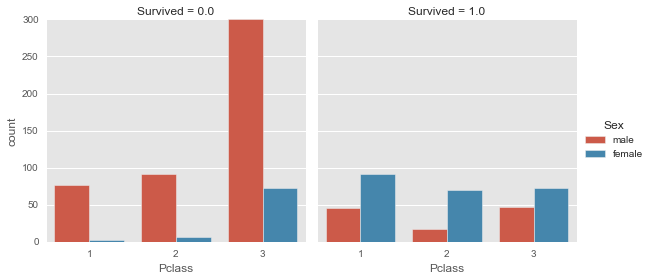

In [25]:
# plot by Pclass, Sex, Survived
_ = sns.factorplot(x='Pclass', hue='Sex', col='Survived', data=titanic, kind='count')



El estado social es bastante claro en sus posibilidades de sobrevivir.

Por último, tengamos una idea de algunas de las otras métricas.

In [26]:
# get stats on all the features
titanic.describe()



,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.278205,33.281086,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.446690,51.741500,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,26.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,36.500000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# III. Feature Engineering

Ahora, sigamos adelante y creemos algunas características nuevas a partir de los datos. La primera característica que veremos en la construcción es FamilySize. Esto es importante de observar porque queremos ver si tener una familia grande o pequeña afectó las posibilidades de supervivencia de alguien.

Las características relevantes que ayudarán con esto son Parch (número de padres / niños a bordo) y SibSp (número de hermanos / cónyuges a bordo). Combinamos las funciones Parch y SibSp y agregamos 1 así como también queremos contar el pasajero para cada observación.

In [27]:
# size of families (including the passenger)
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1

La característica de la cabina en sí misma tal como está ahora realmente no proporciona toda esa información útil. Sin embargo, podemos extraer la primera letra y de esa manera, tendríamos un conjunto agrupado de cabinas que podrían revelar algún efecto sobre la supervivencia.

In [28]:

#  Extraer la primera letra de las mismas cabinas
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])

# view normalized count
titanic.Cabin.value_counts(normalize=True)



U    0.774637
C    0.071811
B    0.049656
D    0.035141
E    0.031322
A    0.016807
F    0.016043
G    0.003820
T    0.000764
Name: Cabin, dtype: float64


En preparación para nuestro modelado, convertiremos algunas de las variables categóricas en números. Recordemos las variables Categoricas con esas que son letras.

In [29]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1


In [30]:
# Convertir male y female groups a una forma de numeros Integers/enteros
titanic.Sex = titanic.Sex.map({"male": 0.0, "female":1.1})

In [31]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
cabin_dummies = pd.get_dummies(titanic.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")

En este paso, concatenamos todas las columnas variables ficticias juntas y descartamos todas las columnas categóricas restantes

In [32]:
# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

# drop categorical fields
titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

titanic_dummies.head()



,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0.0,1,0.0,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,2,1.1,1,1.0,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,1.1,0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,4,1.1,1,1.0,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,5,0.0,0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


Finalmente, como nuestro último paso antes del modelado, separamos el conjunto de datos combinados en sus versiones de prueba y prueba una vez más.

In [33]:
# create train and test data
train = titanic_dummies[ :train_idx]
test = titanic_dummies[test_idx: ]

# convert Survived and Sex back to integer 0 or 1 ya que este esta en format float 0.0 or 1.0
train.Survived = train.Survived.astype(int)
train.Sex = train.Sex.astype(int)


/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
train.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,2,1,1,1,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,4,1,1,1,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
train.shape

(891, 29)

In [36]:
test.shape

(418, 29)

Hasta aqui tenemos todo listo para crear los modelos de Machine Learning.

# Crear el train_set  , el validation_set y guardarlos en el disco

Creando el Validation dataset.
En Machine Learning es comun dividir el data en estos porcentajes
Del 100% del data, 20%es el test_set y otros 20% es validation_set.

extraeremos un 20% del train _dataset que tenemos y sera el validation dataset, este data es para verificar que nuestro modelo es capaz de generalizar lo que aprendio y no memorizar lo que aprendio.

Ahora podemos comenzar con la parte de modelado. Primero, necesitamos convertir los datos de un pandas dataframe a un array de numpy.

In [37]:
X = train.drop('Survived', axis=1).values
y = train.Survived.values

In [38]:
# Importar train_ test split  para partir el data en train y validation
from sklearn.model_selection import train_test_split

# Del total train dataset que tenemos, separamos 20% para el validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0.2)

print('TAMAÑO ORIGINAL del set: ', X.shape)
print('TAMAÑO de X train set: ', X_train.shape)
print('TAMAÑO de X validation set: ', X_val.shape)
print('TAMAÑO de y train: ', y_train.shape)
print('TAMAÑO de y val: ', y_val.shape)

TAMAÑO ORIGINAL del set:  (891, 28)
TAMAÑO de X train set:  (712, 28)
TAMAÑO de X validation set:  (179, 28)
TAMAÑO de y train:  (712,)
TAMAÑO de y val:  (179,)


### Crear X_test (el data donde vamos a probar nuestros modelos y subir sus resultados a Kaggle)
hechar un vistazo a test set y verificar que la columna Survided existe.


In [39]:
test.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
891,34.5,7.8292,0,892,0.0,0,NaN,1,0,0,...,0,0,0,0,0,0,1,0,1,0
892,47.0,7.0000,0,893,1.1,1,NaN,2,0,0,...,0,0,0,0,0,0,1,0,0,1
893,62.0,9.6875,0,894,0.0,0,NaN,1,0,1,...,0,0,0,0,0,0,1,0,1,0
894,27.0,8.6625,0,895,0.0,0,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,1
895,22.0,12.2875,1,896,1.1,1,NaN,3,0,0,...,0,0,0,0,0,0,1,0,0,1


In [40]:
# Remover la columna 'Survided' de nuestro test dataset, ya que es esta columna la que tenemos que predecir
X_test = test.drop('Survived', axis=1).values
# Guardar PassengerId para el final submission
passengerId = test.PassengerId

In [41]:
# Crear variables para guardar nuestro train y validation set en el disk.
train_dataset = train[0: X_train.shape[0]]
validation_dataset = train[X_train.shape[0]:]

print(train_dataset.shape)
print(validation_dataset.shape)

(712, 29)
(179, 29)


In [42]:
# Guardar en el disk nuestro datasets
train_dataset.to_csv('train_set.csv', sep=',', encoding='utf-8', index=False)
validation_dataset.to_csv('validation_set.csv', sep=',', encoding='utf-8', index=False)

In [43]:
test.to_csv('test_set.csv', sep=',', encoding='utf-8', index=False )

# IV. Modelo de Machine Learning


Importamos los paquetes que uzaremos para crear los modelos

In [44]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# for plot learning curves
from mlxtend.plotting import plot_learning_curves # install with pip3 install mlxtend 


# Logistic Regrection

In [45]:
# create param grid object

# instantiate logistic regressor
logreg_model = LogisticRegression()

# load param grid and log model into GridSearcCV
#logreg_model = GridSearchCV(estimator=log, param_grid=log_params, cv=5)

# fit model (pensar en esto como el punto donde se 'entrena el modelo')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
accuracy = logreg_model.score(X_val,y_val)
print(accuracy)

0.821229050279


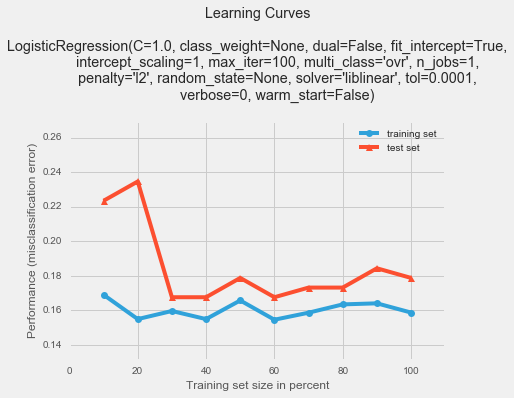

In [50]:
plot_learning_curves(X_train, y_train, X_val, y_val, logreg_model)
plt.show()

### Crear el csv que se va a subir a Kaggle con las preddiciones del modelo LogisticReg

In [51]:
# random forrest prediction on test set
log_pred = logreg_model.predict(X_test)

In [49]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': log_pred} )
# asegurarnos de que el dataframe esta en el formato correcto de Kaggle
kaggle.head(10)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [52]:
kaggle.to_csv('titanic_logreg.csv', index=False)


# Random Forest Model

In [53]:
# instantiate Random Forest model
forrest_model = RandomForestClassifier(n_estimators=10)
forrest_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
accuracy = forrest_model.score(X_val,y_val)
print(accuracy)

0.826815642458


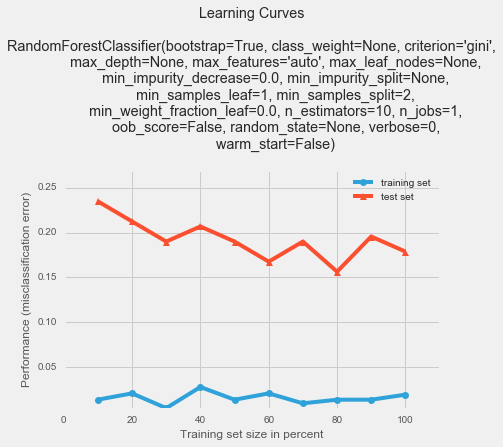

In [55]:
plot_learning_curves(X_train, y_train, X_val, y_val, forrest_model)
plt.show()

In [58]:
# random forrest prediction on test set
forrest_pred = forrest_model.predict(X_test)
print(forrest_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [59]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': forrest_pred} )
# ensure df is in the right format
kaggle.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


In [60]:
kaggle.to_csv('titanic_RandomForest.csv', index=False)
#Final TAREA

Cuales son los features que mas contribuyen a esta prediccion?

In [62]:
# Obteniendo los nombres y organizando las columnas mas importantes.
feature_columns = list(train.drop('Survived', axis=1).columns)
feature_columns

['Age',
 'Fare',
 'Parch',
 'PassengerId',
 'Sex',
 'SibSp',
 'FamilySize',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Title_Royalty',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_T',
 'Cabin_U',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [63]:
# Look at Feature Importances
pd.DataFrame({"Feature": feature_columns, "Importance": forrest_model.feature_importances_})

,Feature,Importance
0,Age,0.143502
1,Fare,0.129153
2,Parch,0.022120
3,PassengerId,0.151128
4,Sex,0.038291
5,SibSp,0.047036
6,FamilySize,0.041781
7,Pclass_1,0.017483
8,Pclass_2,0.019421
9,Pclass_3,0.042242


# Support Vector Machine Model 

In [64]:
from sklearn import svm as svc
from sklearn.svm import SVC

C = 0.9
# instantiate Random Forest model

svm_model= SVC(kernel='linear', C=C)             # Lento de entrenar
#svm_model = SVC(kernel='rbf', gamma=0.7, C=C)   # Moderadamente rapido de entrenar
#svm_model = SVC(kernel='poly', degree=3, C=C)   # Moderadamente rapido de entrenar
#svm_model = svc.LinearSVC(C=C)                  # Rapido de entrenar / menos Accurate
svm_model.fit(X_train, y_train)


SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
accuracy = svm_model.score(X_val,y_val)
print(accuracy)

0.810055865922


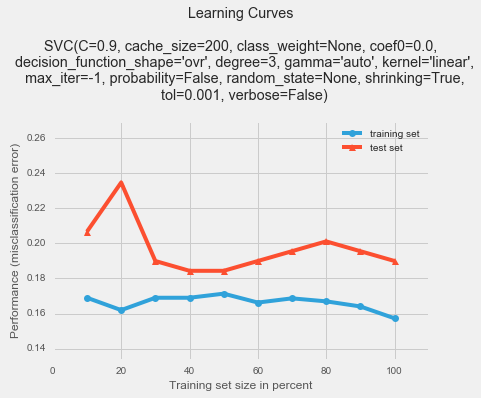

In [136]:
plot_learning_curves(X_train, y_train, X_val, y_val, svm_model)
plt.show()

In [79]:
# random forrest prediction on test set
svm_pred = svm_model.predict(X_test)
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': svm_pred} )
# ensure df is in the right format
kaggle.head(10)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [80]:
kaggle.to_csv('titanic_svm.csv', index=False)
#Final TAREA

# Keras with Tensorflow Neural Net model

Install Tensorflow and Keras

$ pip3 install tensorflow        # OJO! para Python 3.n; version CPU (no GPU support)

$ pip3 install keras

In [66]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from IPython.display import clear_output


Using TensorFlow backend.


In [67]:
keras.__version__

'2.1.2'

In [68]:
class PlotLearning(keras.callbacks.Callback):
    """
    Objeto que sirve para plotear las curvas de aprendisaje uutilzando
    la information de loss y accu de un modelo de Keras.
    """
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 10))

        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="Train loss")
        ax1.plot(self.x, self.val_losses, label="Validation loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="Train accuracy")
        ax2.plot(self.x, self.val_acc, label="Validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()


Se crea la red neural te tipo [N_features, 256 , 128 , 64 , 2]
+ N_features  ->
                1ra capa ocupta con (256 neuronas) ->
                2nda capa oculta con (128 neuronas) -> 
                3ra capa oculta con (64 neuronas) ->
                Capa de Salida con (2 neuronas  que represtan 0 o 1 , muere o vive)
                
N_features = tramaño de X_train


In [72]:
print(X_train.shape)
print('Numero de ejemplos: ', X_train.shape[0])
print('Numero de parametros o features que cada ejmplo tiene: ', X_train.shape[1])

# Se calcula el numero de features.

n_features = X_train.shape[1]

(712, 28)
Numero de ejemplos:  712
Numero de parametros o features que cada ejmplo tiene:  28


In [73]:
# Crear Modelo , eligendo el modelo Sequential
model = Sequential()

# First Hidden Layer with 256 Neurons, ReLU act function for this nodes, Dropout of 30 %
model.add(Dense(units=256, input_dim=n_features))
model.add(Activation("relu"))
model.add(keras.layers.core.Dropout(0.3))

# Second Hidden Layer with 128 Neurons with ReLU act function, Dropout of 20%
model.add(Dense(units=128))
model.add(Activation("relu"))
model.add(keras.layers.core.Dropout(0.2))

# Thirth Hidden Layer with 64 Neurons, ReLU act function
model.add(Dense(units=64))
model.add(Activation("relu"))

# Outout Layer with Two nodes, SOFTMAX as activation function ya que tenemos 
# classification binaria.
model.add(Dense(units=2))
model.add(Activation("softmax"))



/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=28, units=256)`
  """
/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128)`
  # Remove the CWD from sys.path while we load stuff.
/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64)`
  from ipykernel import kernelapp as app
/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2)`


In [74]:
# Se compila el modelo, se escoje optimizador y metricas para verificar su desempeño
# en general no se tocan estos parametros para casos simples

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# Tamaño de y_train 
y_train.shape

(712,)

In [76]:
# Se transforma el output y_train de  dimencion y = (712,), donde y puede ser igual  0 o  1 
# a categorica y = [0,1]
# igual para y_val
y_train  = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

In [77]:
y_train

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

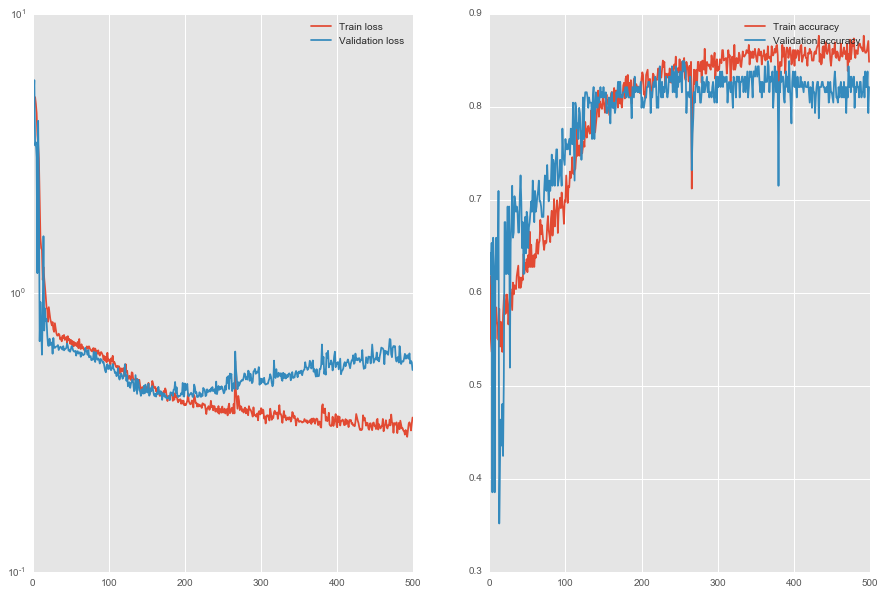

In [78]:
history = model.fit(X_train, y_train,
          epochs=500,
          validation_data=(X_val, y_val),
          callbacks=[plot],
          verbose=0)

In [81]:
loss_and_metrics = model.evaluate(X_val, y_val)
print(loss_and_metrics)
print("%s: %.2f%%" % (model.metrics_names[1], loss_and_metrics[1]*100))

179/179 [==============================] - 0s 72us/step
[0.52879697850296614, 0.8212290549411454]
acc: 82.12%


In [82]:
classes = model.predict_classes(X_test, batch_size=32)

In [83]:
print(classes)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [84]:
nn_predict = classes

In [85]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': nn_predict} )
# ensure df is in the right format
kaggle.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [86]:
kaggle.to_csv('titanic_nn.csv', index=False)